# Lab-based Group Assignment 4: 
## Prediction of Product Satisfaction by using Customer Reviews

![Imgur](https://i.imgur.com/4HJknC2.png)

## Business Problem
For clothing companies, it is very important to quantify customers' satisfaction on your products so that customer retention team could intervene with corresponding measures before the customers churn due to dissatisfaction (e.g. provide refund for customers who have very low satisfaction on your product, while only provide replacement for customers who have relatively low satisfaction).  
  
Such kind of quantification is very easy to do on e-commerce websites since customers who write reviews for products would also providing a rating for the product. However, for customers who shop offline and for those who discuss about the products through other online channels such as Twitter and blogs, such kind of quantification doesn't exist, which hinders the ability of a company to retain these customers.  
  
Therefore, it is crucial for a company to create a satisfaction rating prediction model based on customers' discussion.  

![Imgur](https://i.imgur.com/O1XLXaS.png)

Credit: Amazon Seller Center

## Working with Text Data

![Imgur](https://i.imgur.com/CLfKQQP.png)

**Credit:** Chollet, Francois "Deep learning with Python (2017)."

## Representing Words

![Imgur](https://i.imgur.com/jeQLzxq.png)

## Task 
For this assignment, you are required to create a rating prediction model based on customers' reviews about women's clothing on an e-commerce platform.

# File Preparation:

Read the data into a dataframe. **Reviews with no rating and ratings with no review text should be excluded from the dataframe.**

TIPS:The columns you would use are the rating column and review text column

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/Colab Files/Practice Files - Lab 4/Womens Clothing E-Commerce Reviews.csv",index_col=0)
df=df.loc[:,["Review Text","Rating"]].dropna().reset_index(drop=True)

After cleaning the data, you should have 22641 reviews available.

In [3]:
len(df)

22641

**QUESTION:** Let's look at the distribution of the rating, what do you find out? What should you do when splitting training and testing datasets in order to to mitigate potential issues?

In [4]:
df["Rating"].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

**Answer:**  
The distribution of the rating is uneven. Nearly 55% of the reviews have a 5-star rating. Therefore, in order to ensure each subgroup within the population receives proper representation within the sample, we need to do a stratified sampling.  

(Two other methods are to give more weights on less reprsented ratings or to give less weight on more represented ratings. This is an advanced sampling technique that is very useful when training on contingencies such as credit fraud)

Build a train dataset for model training and validation dataset for model assessment.  
90% of the data should be used to build the training subset, while 10% of the data should be used to build the validation subset.  
You should use review text as the predictor and rating as the outcome.  

In [5]:
from sklearn.model_selection import train_test_split
rev=df["Review Text"]
target=df["Rating"]
#change the test size here! 
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.1,random_state=0,stratify=target)

## 1. Provide a common-sense, non-machine learning baseline prediction
**TIPS:**  
**Treat rating as a continuous variable for this assignment.**  
Although technically, the rating is a categorical variable (you can only choose between 1,2,3,4, and 5). In this scenario, it is possible to treat it as a continuous variable when doing prediction.  
For example, a rating of 3.7 generated by the prediction model indicates that the customer has a satisfaction level of around 3-4, with an inclination towards 4.   

In [6]:
average_rating=y_test.mean()
mae=0
for rating in y_test:
  mae+=abs(rating-average_rating)
print(mae/len(y_test))

0.9041474789117512


**Answer:**  
Always predict that the rating is the average rating of the test dataset rating. In this case, the mean absolute percent error is about **0.904**.  

(Other metrics include MSE, MAPE, etc)  

## Predict the rating using SimpleRNN and your own word embedding,

Rubric: Use Tokenizer (one-hot encoding was not recommended in 4.1), use embedding layer, use simpleRNN layer, dropout and stacking are optional

## Using pre-trained word embeddings

![Imgur](https://i.imgur.com/DLK2ywd.png)

![Imgur](https://i.imgur.com/LQUIc5o.png)

![Imgur](https://i.imgur.com/ZkHz0Rb.png)

In [7]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000      #How many input dimension I have

maxlen = 20               #Maximum Sequence Length
batch_size = 32

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)     # Transforms each text in tests to a sequence of integers. it basically takes each word in the text

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# X_train with upper case "X" is tokenized, x_train with lower case "x" is not

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

20376 train sequences
2265 test sequences
Pad sequences (samples x text length)
X_train shape: (20376, 20)
X_test shape: (2265, 20)


In [8]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1323,5,893,275,4,2,330,475,5,70,226,17,21,2,26,546,2073,18,187,8142
1,20,8,57,3,71,5,95,98,4,50,78,150,1161,41,9,104,13,2493,95,636
2,3,29,1139,3,127,222,544,10,2,105,17,71,267,4,142,6,144,211,152,1681
3,85,190,2,64,14,8,26,7,17,68,4,202,2,819,26,2,399,7,68,36
4,3,65,9,23,80,993,15,128,113,35,145,518,62,4,2,360,7,5,62,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,16,24,69,11,16,24,495,2,26,46,407,18,2594,1420,4,112,31,49,52,274
20372,17,99,69,4,276,9,33,3,92,17,196,216,10,6,6,7,5,1184,13,220
20373,751,1135,18,843,378,2,83,7,1551,4,827,131,20,29,45,74,4,56,30,421
20374,3,53,2,47,2,26,40,782,148,14,31,778,6,42,25,166,168,15,60,98


## Fundamentals of Recurrent Neural Networks (RNNs)

Why we are not use Full Connected Networks
- Cannot learn the position of words in text
- Inputs and outputs can have different size, and it is too complex to use classic NNs

![Imgur](https://i.imgur.com/g7Jnn7o.png)

## Vanishing Gradients and Exploding Gradients Problems
RNN cannot capture long-range dependencies because we have deep layers 
- Exploding gradients - Gradient Clipping (Give threshold value and clip gradient vectors )
- Vanishing gradients - Long Short Term Memory (LSTM)

![Imgur](https://i.imgur.com/4mAUXhg.png)

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
embedding_dim = 64
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs

model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 64)`.

model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(32)) # default activation is "tanh"
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 32)            3104      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 16)            784       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 645,489
Trainable params: 645,489
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 9s 25ms/step - loss: 0.9042 - mape: 38.3796 - val_loss: 0.8171 - val_mape: 38.1722
Epoch 2/10
256/256 [==============================] - 6s 23ms/step - loss: 0.8008 - mape: 36.0020 - val_loss: 0.7324 - val_mape: 31.5769
Epoch 3/10
256/256 [==============================] - 6s 23ms/step - loss: 0.6464 - mape: 26.6893 - val_loss: 0.6393 - val_mape: 26.3474
Epoch 4/10
256/256 [==============================] - 6s 23ms/step - loss: 0.5599 - mape: 23.1493 - val_loss: 0.6276 - val_mape: 24.7232
Epoch 5/10
256/256 [==============================] - 6s 23ms/step - loss: 0.5684 - mape: 23.6932 - val_loss: 0.6068 - val_mape: 24.0324
Epoch 6/10
256/256 [==============================] - 6s 23ms/step - loss: 0.5351 - mape: 20.5218 - val_loss: 0.6420 - val_mape: 25.3565
Epoch 7/10
256/256 [==============================] - 6s 23ms/step - loss: 0.4711 - mape: 19.5477 - val_loss: 0.6118 - val_mape: 25.2018
Epoch 8/10
256/256 [=====================

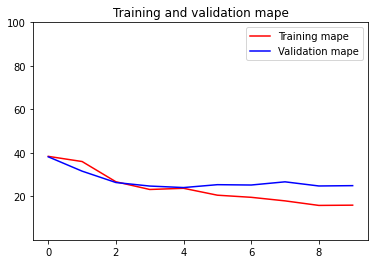

In [11]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

There is an obvious overfitting problem.

## Predict using Conv1D with word embedding.

Rubric: Use Tokenizer, use GLove enbedding, use Conv1D, dropout and stacking are optional

In [13]:
from keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             10272     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [14]:
model.compile(optimizer='adam', loss='mse', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 6s 20ms/step - loss: 2.0085 - mape: 34.0115 - val_loss: 0.9800 - val_mape: 26.8800
Epoch 2/10
256/256 [==============================] - 5s 20ms/step - loss: 0.8980 - mape: 26.4740 - val_loss: 0.8297 - val_mape: 25.5020
Epoch 3/10
256/256 [==============================] - 5s 19ms/step - loss: 0.7370 - mape: 23.4706 - val_loss: 0.8302 - val_mape: 25.1827
Epoch 4/10
256/256 [==============================] - 5s 19ms/step - loss: 0.6099 - mape: 20.8189 - val_loss: 0.8117 - val_mape: 24.7211
Epoch 5/10
256/256 [==============================] - 5s 19ms/step - loss: 0.6425 - mape: 21.8722 - val_loss: 0.8143 - val_mape: 24.6261
Epoch 6/10
256/256 [==============================] - 5s 18ms/step - loss: 0.4025 - mape: 16.4560 - val_loss: 0.8509 - val_mape: 24.8845
Epoch 7/10
256/256 [==============================] - 5s 18ms/step - loss: 0.4122 - mape: 16.4628 - val_loss: 0.8706 - val_mape: 25.2162
Epoch 8/10
256/256 [=====================

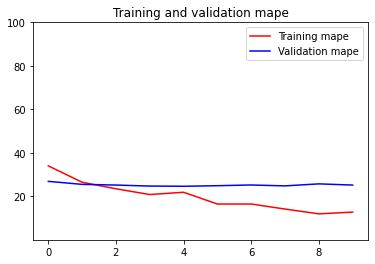

In [15]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

Overfitting problem.

## Reqularization with LSTM

In [17]:
from keras import layers

model = Sequential()
#model.add(layers.Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 652,449
Trainable params: 652,449
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mse', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 14s 43ms/step - loss: 2.6524 - mape: 38.8428 - val_loss: 1.1377 - val_mape: 32.2403
Epoch 2/10
256/256 [==============================] - 11s 41ms/step - loss: 1.0078 - mape: 29.3783 - val_loss: 0.8777 - val_mape: 26.1167
Epoch 3/10
256/256 [==============================] - 11s 43ms/step - loss: 0.7552 - mape: 23.1641 - val_loss: 0.8051 - val_mape: 24.0977
Epoch 4/10
256/256 [==============================] - 11s 42ms/step - loss: 0.7061 - mape: 22.7008 - val_loss: 0.8100 - val_mape: 23.3205
Epoch 5/10
256/256 [==============================] - 11s 42ms/step - loss: 0.7148 - mape: 22.9965 - val_loss: 0.7675 - val_mape: 23.4120
Epoch 6/10
256/256 [==============================] - 11s 42ms/step - loss: 0.5847 - mape: 19.8965 - val_loss: 0.8102 - val_mape: 24.0322
Epoch 7/10
256/256 [==============================] - 11s 42ms/step - loss: 0.5819 - mape: 19.8781 - val_loss: 0.7860 - val_mape: 23.4314
Epoch 8/10
256/256 [==============

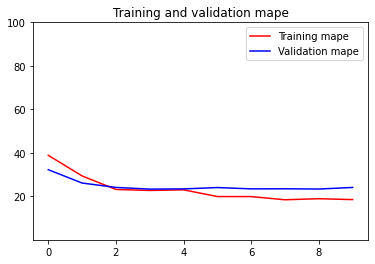

In [19]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

Major underfitting problem. Overfitting problem is improved.\
They are close and we reduce validation error as well.\
LSTM works better than RNN, we are reducing vanishing gradient problem.

## Regularization with CNN and LSTM   
**Instructions:**  You are required to use dropout when building prediction model in this question.  

In [20]:
model = Sequential()
model.add(Embedding(max_features,64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            20544     
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 672,993
Trainable params: 672,993
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='mse', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 15s 42ms/step - loss: 2.2889 - mape: 36.9283 - val_loss: 0.9950 - val_mape: 29.0787
Epoch 2/10
256/256 [==============================] - 11s 41ms/step - loss: 0.8827 - mape: 26.3161 - val_loss: 0.8125 - val_mape: 25.3009
Epoch 3/10
256/256 [==============================] - 11s 42ms/step - loss: 0.7476 - mape: 23.6575 - val_loss: 0.7989 - val_mape: 24.2443
Epoch 4/10
256/256 [==============================] - 11s 42ms/step - loss: 0.6320 - mape: 20.8518 - val_loss: 0.7823 - val_mape: 23.9498
Epoch 5/10
256/256 [==============================] - 11s 43ms/step - loss: 0.6968 - mape: 22.7453 - val_loss: 0.7965 - val_mape: 23.6379
Epoch 6/10
256/256 [==============================] - 11s 41ms/step - loss: 0.5040 - mape: 18.2055 - val_loss: 0.8031 - val_mape: 23.3818
Epoch 7/10
256/256 [==============================] - 11s 42ms/step - loss: 0.5342 - mape: 18.8101 - val_loss: 0.8003 - val_mape: 23.6021
Epoch 8/10
256/256 [==============

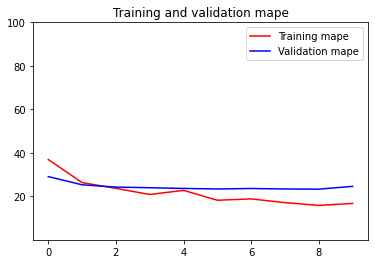

In [22]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

Training mape get improved, still major underfitting problem.\
Now, let's try Bidirectional method.

In [23]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.Bidirectional(
    layers.LSTM(64,dropout=0.2,recurrent_dropout=0.2)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            20544     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 726,721
Trainable params: 726,721
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mse', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()

Epoch 1/10
256/256 [==============================] - 26s 77ms/step - loss: 1.9455 - mape: 33.3107 - val_loss: 0.8456 - val_mape: 25.7463
Epoch 2/10
256/256 [==============================] - 19s 74ms/step - loss: 0.8543 - mape: 26.0233 - val_loss: 0.8096 - val_mape: 24.6980
Epoch 3/10
256/256 [==============================] - 19s 76ms/step - loss: 0.7168 - mape: 22.8660 - val_loss: 0.8157 - val_mape: 24.1181
Epoch 4/10
256/256 [==============================] - 19s 75ms/step - loss: 0.6673 - mape: 21.8815 - val_loss: 0.7930 - val_mape: 23.7934
Epoch 5/10
256/256 [==============================] - 19s 74ms/step - loss: 0.6495 - mape: 21.3223 - val_loss: 0.7865 - val_mape: 23.9094
Epoch 6/10
256/256 [==============================] - 19s 74ms/step - loss: 0.5156 - mape: 18.4841 - val_loss: 0.8186 - val_mape: 24.1489
Epoch 7/10
256/256 [==============================] - 19s 74ms/step - loss: 0.5318 - mape: 19.0123 - val_loss: 0.8001 - val_mape: 23.8116
Epoch 8/10
256/256 [==============

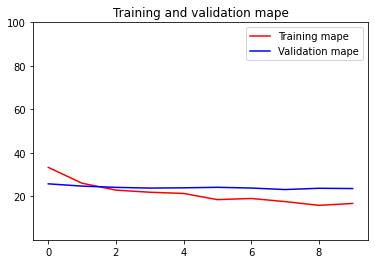

In [25]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

In [26]:
model.save('/content/modelrating.h5')

## Design My Own Structure

In [27]:
from sklearn.model_selection import train_test_split
rev=df["Review Text"]
target=df["Rating"]
#change the test size here! 
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.2,random_state=0,stratify=target)

In [35]:
max_features = 10000      #How many input dimension I have
maxlen = 100               #Maximum Sequence Length
batch_size = 32
embedding_dim = 64

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)     # Transforms each text in tests to a sequence of integers.

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# X_train with upper case "X" is tokenized, x_train with lower case "x" is not

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

18112 train sequences
4529 test sequences
Pad sequences (samples x text length)
X_train shape: (18112, 20)
X_test shape: (4529, 20)


In [48]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(128, 10, activation='relu'))
model.add(layers.Bidirectional(
    layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 128)           163968    
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2,232,961
Trainable params: 2,232,961
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
ES=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.
RL=ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1, min_delta=1e-5)   # Reduce Learning Rate on Plateau: if in 2 consecutive eposchs, the validation loss din't reduce, reduce learning rate.

model.compile(optimizer='adam', loss='mse', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=30,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test),
                    callbacks=[ES,RL] 
                    )
keras.backend.clear_session()

Epoch 1/30
256/256 [==============================] - 68s 248ms/step - loss: 1.5228 - mape: 30.8065 - val_loss: 0.8698 - val_mape: 25.9979 - lr: 0.0010
Epoch 2/30
256/256 [==============================] - 63s 248ms/step - loss: 0.8546 - mape: 25.8018 - val_loss: 0.8317 - val_mape: 25.8013 - lr: 0.0010
Epoch 3/30
256/256 [==============================] - 64s 249ms/step - loss: 0.6444 - mape: 21.2988 - val_loss: 0.8495 - val_mape: 24.6273 - lr: 0.0010
Epoch 4/30
256/256 [==============================] - ETA: 0s - loss: 0.6604 - mape: 21.8316
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
256/256 [==============================] - 64s 249ms/step - loss: 0.6604 - mape: 21.8316 - val_loss: 0.8584 - val_mape: 24.4883 - lr: 0.0010
Epoch 5/30
256/256 [==============================] - 64s 250ms/step - loss: 0.4968 - mape: 17.9051 - val_loss: 0.8388 - val_mape: 24.4692 - lr: 1.0000e-04
Epoch 6/30
256/256 [==============================] - 64s 251ms/step - lo

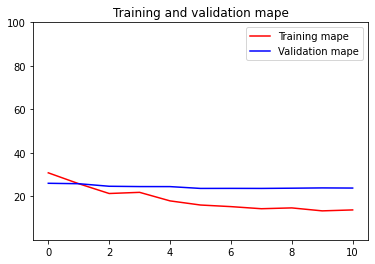

In [50]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

I set the training-testing dataset ratio to 80/20, and changed the max_len to 100. Then I enlarged the dimension of each layer to intense the learning ability. I also add tricks like early stopping and reducing learning rate.\
The val_mape is at best 23.6363, which outperformed those models above. However, there's still a overfitting problem and the mape is not small enough.